### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

--答案写这里--

- 自变量：文字条件，即文字的颜色词与幽默颜色是否一致。比如‘红色’词用的红色油墨表示一致，‘绿色’词用的蓝色油墨表示不一致；
- 因变量：每位参与者念出同等大小的列表的文字墨色名称的时间；

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

--答案写这里--  

- 假设：   
   定义μ0为在一致的文字条件下念出油墨颜色的平均时间，定义μ为在不一致的文字条件下念出油墨颜色的平均时间。μ和μ0代表的是均值，针对的是总体。  
   **零假设（H0）：**在两种不同文字条件下念出文字油墨颜色的时间没有显著差异，即：   
   μ=μ0；  
   **对立假设（H1）：**在两种不同文字条件下念出文字油墨颜色的时间具有显著差异，即：  
   μ≠μ0（双侧检验）  
   **显著水平：**0.05
   
   
- 选择统计检验类型：双总体配对样本t检验。理由：在Stroop实验中，可获得的数据是两个样本（两种不同文字条件下念出油墨颜色名称的时间），并且需要比较二者代表的总体的差异性，而总体的标准差是未知的，因此满足双总体t检验的条件。此外进行两种实验的对象是相同的，两种情况组成的样本为相关样本，所以适用于配对样本t检验。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 在这里执行你的分析
import numpy as np
import pandas as pd
data = pd.read_csv("stroopdata.csv")
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


--答案写这里--

- "一致文字条件"样本：   
均值：14.05  
中位数：14.36  
标准偏差：3.56  
四分位差：4.30


- "非一致文字条件"样本：  
   均值：22.01  
   中位数：21.02  
   标准偏差：4.80  
   四分位差：5.33
   

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [2]:
# 在这里创建可视化图表
import seaborn as sb
import matplotlib.pyplot as plt
data[['Congruent','Incongruent']].plot(kind='kde');

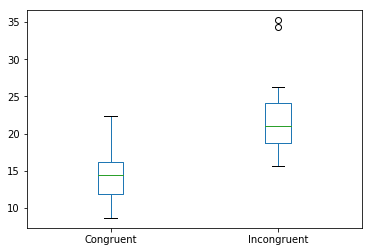

In [3]:
data[['Congruent','Incongruent']].plot(kind='box');

--答案写这里--  
- ‘一致文字条件’样本呈正态分布，‘非一致文字条件’样本大体也呈正态分布，只是在最大值方向有少量异常值。  
- 两个样本的分布有一定的重复区域，‘非一致文字条件’均值要大一些。  
- ‘一致文字条件’样本显得稍微更瘦，‘非一致文字条件’样本的分布更宽。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [4]:
# 在这里执行统计检验
from scipy import stats

# ‘一致文字条件’称为样本1，‘非一致文字条件’称为样本2

# 样本1和样本2的均值
mean_1 = data['Congruent'].mean()
mean_2 = data['Incongruent'].mean()

# 样本1和样本2的均值差
M = mean_1 - mean_2

# 数据集增加一列为样本1与样本2的差值
data['diff'] = data['Congruent'] - data['Incongruent']

# 数据集增加一列为每项差值与均值差值的差值平方
data['diff_square'] = (data['diff'] - M) ** 2

# 自由度
df = data.shape[0] - 1

# 计算差值的标准差
sd = np.sqrt((data['diff_square'].sum()) / df)

# 计算t值和p值
t, p= stats.ttest_rel(data['Congruent'], data['Incongruent'])
#t = M / (sd / np.sqrt(data.shape[0]))


# 查表t0值，假设显著水平为0.05，基于双侧检验，
t0 = 2.069

# 计算置信区间
CI_left = M - t0 * sd / np.sqrt(data.shape[0])
CI_right = M + t0 * sd / np.sqrt(data.shape[0])

print("t统计值为%.2f, 概率为%e" %(t,p))
print("置信区间为(%.2f, %.2f)" %(CI_left, CI_right))

#print(mean_1,mean_2,M,df,sd,t,CI_left,CI_right)

t统计值为-8.02, 概率为4.103001e-08
置信区间为(-10.02, -5.91)


--答案写这里--
从计算结果来看，t统计值的绝对值远大于t0，概率远小于显著水平0.5，表示成功拒绝了零假设，即在两种不同的文字条件下说出文字油墨颜色名称的时间具有显著的差异。此结论与我的期望着是一致的。

